## Question 1

For this question, what we are really trying to find is the probability that a shoe at a price point is problematic given its price and what we know from the sample. Or, in mathematical notation P(Counterfeit | Price > X) = 95%, and we are trying to find X. If we are to take the samples findings literally, one could assume that any price point above $50 has a 100% chance of being counterfeit, so it is some price point below that.

For this question, Im going to simulate a normal curve and assume the "guide price is $48~$68" means one standard deviations from the mean, which covers enough of the price distribution (68%) to be considered a guide price. Furthermore, I use the clue that 6% of the counterfeit items are in the $30 price range, so from a price distribution standpoint, our normal curve should have around 60 shoes near the 30 mark.

To answer this question using Bayes Theorem, we calculate it as (P(C)*P(Price > X | Counterfeit))/P(Price > X). Hence, since we dont have information on the other price points, we simulate a normal curve with mean 58, and first standard deviations 48 and 68, and standard deviation 10, and thus, we might have a better shot at answering our question.

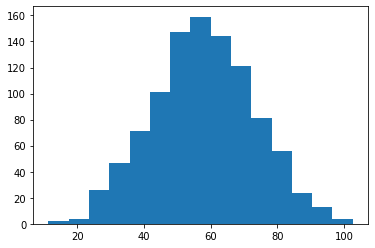

In [36]:
import numpy as np 
import matplotlib.pyplot as plt

Values = np.random.normal(loc=58, scale=15,size=1000) 
plt.hist(Values, bins=15)
plt.show()
plt.clf()


In [37]:
print(sum(i < 35 and i > 25 for i in Values))

64


However, after some snooping around, my findings are that only with a standard deviation of 15 does the 30 range reach numbers closer to our desired 60 samples. Thus, given that, we will continue with those parameters set as such. Now, we need to find a price point range that fits our desired outcome of a 95% probability of not being counterfeit

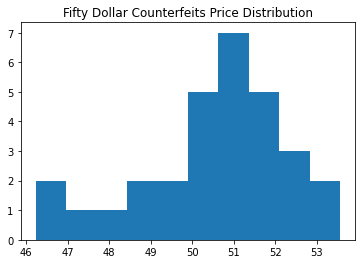

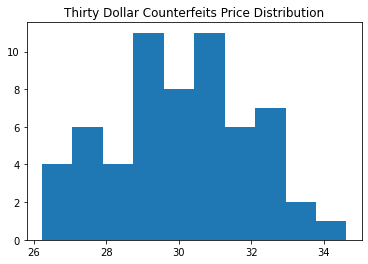

53.7 % Price: 35 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.072
58.33 % Price: 36 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.08
62.12 % Price: 37 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.088
66.67 % Price: 38 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.1
69.42 % Price: 39 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.109
74.16 % Price: 40 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.129
76.02 % Price: 41 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.139
78.49 % Price: 42 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.155
80.62 % Price: 43 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.172
81.79 % Price: 44 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.183
83.5 % Price: 45 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.202
84.64 % Price: 46 P(P>Price | Counterfeit): 0.3333333333333333 P(P>Price): 0.217
86.59 % Price: 47 P(P>Price | Cou

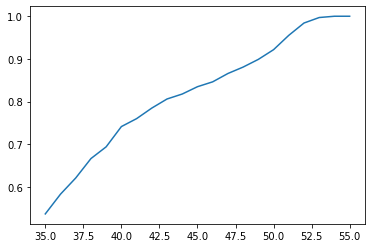

<Figure size 432x288 with 0 Axes>

In [70]:
Fifty_Dollar_Counterfeits = np.random.normal(loc=50, scale=2,size=30) 
plt.hist(Fifty_Dollar_Counterfeits, bins=10)
plt.title("Fifty Dollar Counterfeits Price Distribution")
plt.show()
plt.clf()

Thirty_Dollar_Counterfeits = np.random.normal(loc=30, scale=2,size=60) 
plt.hist(Thirty_Dollar_Counterfeits, bins=10)
plt.title("Thirty Dollar Counterfeits Price Distribution")
plt.show()
plt.clf()

def Bayes_Theorem(Price):
    Prob_Counterfeit = 0.10
    Total_Counterfeits = list(Thirty_Dollar_Counterfeits)+list(Fifty_Dollar_Counterfeits)
    Prob_greaterthan_price_given_cf = (sum(i > Price for i in Total_Counterfeits))/len(Total_Counterfeits)
    Prob_greaterthan_price_Total = (sum(i < Price for i in Values))/len(Values)

    Result = (Prob_Counterfeit*Prob_greaterthan_price_given_cf)/Prob_greaterthan_price_Total 
    print(round((1-Result)*100,2),"% Price:", Price,"P(P>Price | Counterfeit):",Prob_greaterthan_price_given_cf,"P(P>Price):",Prob_greaterthan_price_Total)
    return 1 - Result

Results = []
Prices = []
for Price in range(35,56):
    Results.append(Bayes_Theorem(Price))
    Prices.append(Price)

plt.plot(Prices, Results)
plt.show()
plt.clf()


## Results

So, a lot to unpack here:

- 1) If the counterfeits are concentrated on $50 and $30, to make it more realistic, I made a normal distribution of both with their respective quantities

- 2) I created a function called **Bayes_Theorem**, that does just that, given a price variable, it calculates the **P(Price > P | Counterfeit)**, and **P(Price > P)** so that those can be used together with **P(Counterfeit) == 0.10** to calculate the result, aka **P(Counterfeit | Price > P)**

- 3) To find the best answer, I decided to do a for loop that tests out different prices from $35 - $56, and plotted the probability of not being counterfeit given the pricepoint.

The results are that, any price point that is **>= $54** is a 100% guarantee of not being counterfeit, given our simulation. However, for a more realistic response, if you want to get a cheaper price and are willing to risk a 10% chance of being counterfeit, the right price for you would be a little over **$49**

### **Question 2**

The three questions to answer here are 
- 1) All coefficients of LR are required to be non-negative
- 2) The coefficient of LR is required to satisfy a1 >= a2 >= a3 
- 3) Without constraint, or with either of those two previous, is LR a global or local optimization algorithm?

And for each question
- a) Optimization solution
- b) Code of solution process
- c) Sample code


So lets get started with the first question

In [78]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X, y = load_iris(return_X_y=True)

X_df = pd.DataFrame(data=np.c_[X, y],columns=iris['feature_names']+['target'])
Lasso_Pos_Coefficient = Lasso(alpha=0.0001, precompute=True, max_iter=1000, positive=True, random_state=9999, selection='random')
Lasso_Pos_Coefficient.fit(X,y)

coefficients = pd.concat([pd.DataFrame(X_df.columns), pd.DataFrame(np.transpose(Lasso_Pos_Coefficient.coef_))], axis=1)
print(coefficients)

                   0         0
0  sepal length (cm)  0.000000
1   sepal width (cm)  0.000000
2  petal length (cm)  0.178099
3   petal width (cm)  0.630882
4             target       NaN


For the first question, one of the best and solutions I could find was the use of Lasso regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficient. Using an L1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

Lasso has a parameter called positive, which can be set to True and force the coefficients to be positive. Further, setting the Regularization coefficient alpha to lie close to 0 makes the Lasso mimic Linear Regression with no regularization.

# Final Question

For the final question, with my current knowledge of Data Science and what I have read thus far: The less constraints there are, and the more degrees of freedom a model has, the more it will fit well to the training data and overfit, and find the global minimum, in the training data, is a higher probability. This of course is more true for non-linear models and it is also undesirable since its overfitting to the training data. 

Therefore, I would argue given the current knowledge that I have regarding the subject, that no constraints leads to a higher chance of being a global optimization algorithm.



In [84]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train,y_train)
Lasso_Pos_Coefficient.fit(X_train,y_train)

y_pred_LR = model.predict(X_test)
y_pred_Lasso = Lasso_Pos_Coefficient.predict(X_test)

Other_LR = model.predict(X_train)
Other_Lasso = Lasso_Pos_Coefficient.predict(X_train)

from sklearn.metrics import mean_squared_error
Evaluate_LR = mean_squared_error(y_test, y_pred_LR)
Evaluate_Lasso = mean_squared_error(y_test,y_pred_Lasso)

Eva_Other_LR = mean_squared_error(y_train, Other_LR)
Eva_Other_Lasso = mean_squared_error(y_train, Other_Lasso)

print(f'Positive Coefficient MSE on test set: {Evaluate_Lasso}, and on training set: {Eva_Other_Lasso}')
print(f'Without Constraints MSE on test set: {Evaluate_LR}, and on training set: {Eva_Other_LR}')


Positive Coefficient MSE on test set: 0.03513096601570431, and on training set: 0.05333830655520878
Without Constraints MSE on test set: 0.03711379440797686, and on training set: 0.049093383698217904


## Evaluation:

Just based on these results, the positive coefficient variation performed better on the test set and worse on the training set compared to the normal Linear Regression. This implies that the normal LR overfit more to the training data and found a better minimum, but didnt generalize well enough to new data. Thus, seemingly proving the point made before.